# Using Python for Research Homework: Week 3, Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [ ]:
# DO NOT EDIT THIS CODE!
import os
import pandas as pd
import numpy as np
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

def p(text):
  text=text
  return print(text)

### Exercise 1 

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast` and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. Use the `index_col` argument to set the first column in the csv file as the index for the dataframe. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [ ]:
hamlets = pd.read_csv("/content/hamlets.csv")
p(hamlets.columns)
p(hamlets)
p("--------"*10)
hamlets = pd.read_csv("/content/hamlets.csv", index_col=0)
p(hamlets.columns)
p(hamlets)


Index(['Unnamed: 0', 'language', 'text'], dtype='object')
   Unnamed: 0    language                                               text
0           1     English  The Tragedie of Hamlet\n                      ...
1           2      German  Hamlet, Prinz von Dännemark.\n                ...
2           3  Portuguese  HAMLET\n                             DRAMA EM ...
--------------------------------------------------------------------------------
Index(['language', 'text'], dtype='object')
     language                                               text
1     English  The Tragedie of Hamlet\n                      ...
2      German  Hamlet, Prinz von Dännemark.\n                ...
3  Portuguese  HAMLET\n                             DRAMA EM ...


### Exercise 2 

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. 

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [ ]:
language, text = hamlets.iloc[0]

def recorrer_dataFrame(item1, item2, dataFrame):
  new_data={}
  for i in range(len(dataFrame)):
    item1, item2 = dataFrame.iloc[i]
    new_data[item1]=item2
  return  new_data

new_data = recorrer_dataFrame(language, text, hamlets)

def ordenar_information_words(language,new_data):
  
  data=pd.DataFrame(columns= ("Language","Words", "Count"))
  for i in new_data:
    if i == language:
      row_num=1
      counted_text=count_words_fast(new_data[str(i)])
      for word in counted_text:
        language=language
        count=counted_text[word]
        data.loc[row_num]=language,word, count
        row_num+=1
  return data

data= ordenar_information_words("English", new_data)
data
#
#counted_text=count_words_fast(text)
#p(counted_text)
#p("---"*50)
#data=pd.DataFrame(columns= ("Words", "Count"))
#row_num=1
#for word in counted_text:
#  count=counted_text[word]
#  data.loc[row_num]=word, count
#  row_num+=1
#p(data[1:20])
#  

,Language,Words,Count
1,English,the,935
2,English,tragedie,3
3,English,of,576
4,English,hamlet,97
5,English,,45513
...,...,...,...
5109,English,shooteexeunt,1
5110,English,marching,1
5111,English,peale,1
5112,English,ord,1


### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet. 

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [ ]:
# write your code here!
#for i in range(len(data["Words"])):
#  word_length=[len(data["Words"][i])]
p(data["Words"][5113])
def add_word_length(data):
  word_length=[len(data["Words"][i]) for i in range(1,len(data["Words"])+1)]
  data["Length"]=word_length
  return data

def ask_frecuency(count):
  if count > 10:
    return "is frequent"
  elif 1 < count <=10:
    return "is infrequent"
  elif count==1:
    return "is unique"

def add_word_frecuency(data):
  word_frecuency=[ ask_frecuency(data["Count"][i]) for i in range(1,len(data["Count"])+1)]
  data["Frequency"]=word_frecuency
  return data

data2= add_word_frecuency(data)
data= add_word_length(data)
#p(len(data["Words"]))
#p(len(word_frecuency))
#
#p(word_frecuency[5111])
#p(word_length[5111])
p(data)
#data2=list(range(1,len(data["Words"])+1))
#data2[5100:]




finis
     Language         Words  Count      Frequency  Length
1     English           the    935    is frequent       3
2     English      tragedie      3  is infrequent       8
3     English            of    576    is frequent       2
4     English        hamlet     97    is frequent       6
5     English                45513    is frequent       0
...       ...           ...    ...            ...     ...
5109  English  shooteexeunt      1      is unique      12
5110  English      marching      1      is unique       8
5111  English         peale      1      is unique       5
5112  English           ord      1      is unique       3
5113  English         finis      1      is unique       5

[5113 rows x 5 columns]


### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. 

#### Instructions 
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text (defined in Exercise 2).
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [ ]:
sub_data=pd.DataFrame(columns= ("language", "word", "frecuency", "mean_word_length", "num_words"))
sub_data["language"]=data["Language"]
sub_data["frecuency"]=data["Frequency"]
sub_data["mean_word_length"]=data["Length"]
sub_data["num_words"]=data["Count"]
sub_data["word"]=data["Words"]
sub_data


,language,word,frecuency,mean_word_length,num_words
1,English,the,is frequent,3,935
2,English,tragedie,is infrequent,8,3
3,English,of,is frequent,2,576
4,English,hamlet,is frequent,6,97
5,English,,is frequent,0,45513
...,...,...,...,...,...
5109,English,shooteexeunt,is unique,12,1
5110,English,marching,is unique,8,1
5111,English,peale,is unique,5,1
5112,English,ord,is unique,3,1


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions 
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [ ]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)
    
# write your code here!


In [ ]:
language,text= hamlets.iloc[0]
data_English=summarize_text(language,text)
language,text= hamlets.iloc[1]
data_German=summarize_text(language,text)
language,text= hamlets.iloc[2]
data_Portugese=summarize_text(language,text)
p(data_English)
p("---"*20)
grouped_data=data_English.append(data_German).append(data_Portugese)
p(grouped_data)

           language   frequency  mean_word_length  num_words
frequency                                                   
frequent    English    frequent          4.371517        323
infrequent  English  infrequent          5.825243       1442
unique      English      unique          7.005675       3348
------------------------------------------------------------
              language   frequency  mean_word_length  num_words
frequency                                                      
frequent       English    frequent          4.371517        323
infrequent     English  infrequent          5.825243       1442
unique         English      unique          7.005675       3348
frequent        German    frequent          4.528053        303
infrequent      German  infrequent          6.481830       1596
unique          German      unique          9.006987       5582
frequent    Portuguese    frequent          4.417625        261
infrequent  Portuguese  infrequent          6.497870      

### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions 
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

In [ ]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt

def Graficar(grouped_data,language:str):
  for i in range(grouped_data.shape[0]):
    if language=="all":
      row = grouped_data.iloc[i]
      plt.plot(row.mean_word_length, row.num_words,
      marker=markers[row.frequency],
      color = colors[row.language],
      markersize = 10
      )
    elif grouped_data.iloc[i]["language"]==language:
      row = grouped_data.iloc[i]
      plt.plot(row.mean_word_length, row.num_words,
          marker=markers[row.frequency],
          color = colors[row.language],
          markersize = 10
      )

  color_legend = []
  marker_legend = []
  for color in colors:
      color_legend.append(
          plt.plot([], [],
          color=colors[color],
          marker="o",
          label = color, markersize = 10, linestyle="None")
      )
  for marker in markers:
      marker_legend.append(
          plt.plot([], [],
          color="k",
          marker=markers[marker],
          label = marker, markersize = 10, linestyle="None")
      )
  plt.legend(numpoints=1, loc = "upper left")
  plt.xlabel("Mean Word Length")
  plt.ylabel("Number of Words")
  return plt.show()
# write your code to display the plot here!



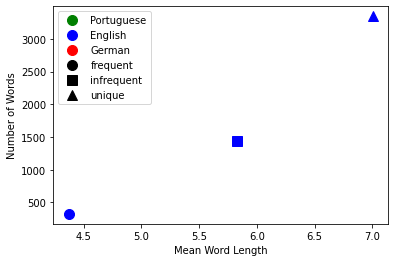

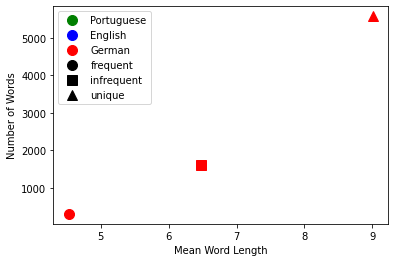

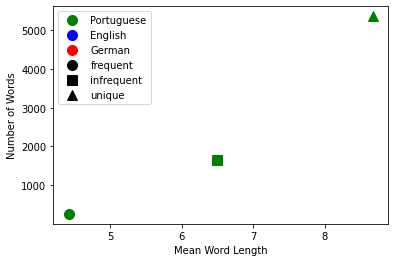

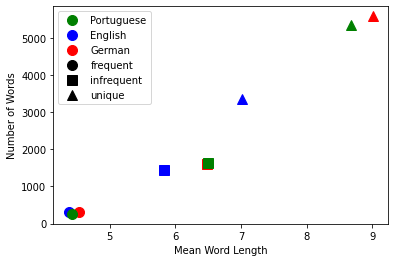

In [ ]:
Graficar(grouped_data, "English")
Graficar(grouped_data, "German")
Graficar(grouped_data, "Portuguese")
Graficar(grouped_data, "all")
#grouped_data.iloc[0]["language"]